In [2]:
import json 
import string 
from bs4 import BeautifulSoup

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# plot accuracy and loss
def plot_results(training_results):
  plt.plot(training_results.history['accuracy'])
  plt.plot(training_results.history['val_accuracy'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')

  plt.legend(['train', 'val'], loc='upper left')

  plt.show()

  plt.plot(training_results.history['loss'])
  plt.plot(training_results.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')

  plt.legend(['train', 'val'], loc='upper left')

  plt.show()

In [6]:
with open("../data/Sarcasm_Headlines_Dataset_v2.json", 'r') as file_:
  datastore = json.load(file_)['items']

table = str.maketrans('', '', string.punctuation)

stopwords = []
with open("../data/stop.txt", 'r') as file_:
  stopwords = file_.read().splitlines()

sentences = []
labels = []
urls = []

for item in datastore:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")

  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  words = sentence.split()
  filtered_sentence = ""
  for word in words:
    word = word.translate(table)
    if word not in stopwords:
      filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [8]:
training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [10]:
vocab_size = 20000
max_length = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

In [10]:
print(word_index)
print(training_sequences[0])
print(training_padded[0])

{'<OOV>': 1, 'new': 2, 'man': 3, 'trump': 4, 'report': 5, 'one': 6, 'year': 7, 'u': 8, 'woman': 9, 'area': 10, 'day': 11, 'says': 12, 'like': 13, 'first': 14, 'time': 15, 'donald': 16, 'get': 17, 'old': 18, 'life': 19, 'people': 20, 'trumps': 21, 'house': 22, 'white': 23, 'obama': 24, 'make': 25, 'back': 26, 'still': 27, 'women': 28, 'world': 29, '5': 30, 'way': 31, 'could': 32, 'years': 33, 'clinton': 34, 'americans': 35, 'family': 36, 'black': 37, 'would': 38, 'study': 39, 'american': 40, 'cant': 41, 'best': 42, '3': 43, 'school': 44, 'gop': 45, 'know': 46, 'bill': 47, 'really': 48, 'show': 49, 'last': 50, 'finds': 51, 'home': 52, 'nation': 53, 'watch': 54, '10': 55, 'good': 56, 'going': 57, 'say': 58, 'police': 59, 'death': 60, 'video': 61, 'president': 62, 'things': 63, 'big': 64, 'parents': 65, 'state': 66, 'health': 67, 'love': 68, 'right': 69, 'getting': 70, '2': 71, 'mom': 72, 'every': 73, 'party': 74, 'campaign': 75, 'gets': 76, 'need': 77, 'dead': 78, 'work': 79, 'self': 80, 

In [11]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Epoch 1/30
719/719 [==============================] - 41s 7ms/step - loss: 0.6877 - accuracy: 0.5447 - val_loss: 0.6788 - val_accuracy: 0.6077
Epoch 2/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6624 - accuracy: 0.6584 - val_loss: 0.6431 - val_accuracy: 0.6926
Epoch 3/30
719/719 [==============================] - 5s 7ms/step - loss: 0.6074 - accuracy: 0.7400 - val_loss: 0.5846 - val_accuracy: 0.7399
Epoch 4/30
719/719 [==============================] - 5s 7ms/step - loss: 0.5295 - accuracy: 0.7957 - val_loss: 0.5226 - val_accuracy: 0.7725
Epoch 5/30
719/719 [==============================] - 5s 7ms/step - loss: 0.4524 - accuracy: 0.8369 - val_loss: 0.4733 - val_accuracy: 0.7901
Epoch 6/30
719/719 [==============================] - 5s 7ms/step - loss: 0.3895 - accuracy: 0.8598 - val_loss: 0.4417 - val_accuracy: 0.7990
Epoch 7/30
719/719 [==============================] - 5s 7ms/step - loss: 0.3408 - accuracy: 0.8780 - val_loss: 0.4224 - val_accuracy: 0.8017
Epoch

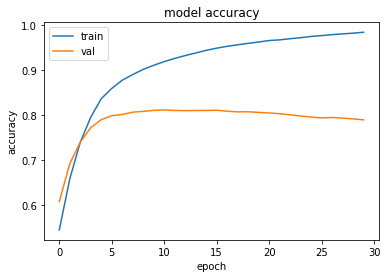

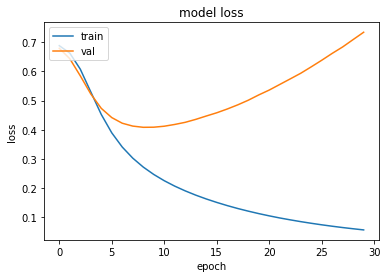

In [42]:
# Attempt 1

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

In [13]:
# Attempt 2: Reduced Vocab Size

vocab_size = 2000
max_length = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Epoch 1/30
719/719 [==============================] - 3s 3ms/step - loss: 0.6885 - accuracy: 0.5918 - val_loss: 0.6810 - val_accuracy: 0.6331
Epoch 2/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6679 - accuracy: 0.6521 - val_loss: 0.6508 - val_accuracy: 0.6634
Epoch 3/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6299 - accuracy: 0.6880 - val_loss: 0.6089 - val_accuracy: 0.6953
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5830 - accuracy: 0.7267 - val_loss: 0.5652 - val_accuracy: 0.7316
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5362 - accuracy: 0.7575 - val_loss: 0.5270 - val_accuracy: 0.7492
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.4972 - accuracy: 0.7767 - val_loss: 0.5004 - val_accuracy: 0.7576
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.4689 - accuracy: 0.7866 - val_loss: 0.4833 - val_accuracy: 0.7636
Epoch 

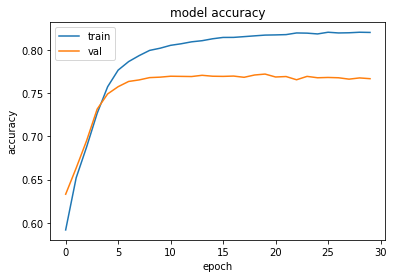

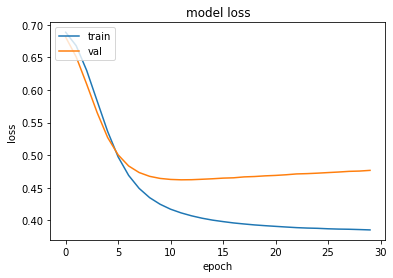

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

Epoch 1/30
719/719 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.5512 - val_loss: 0.6832 - val_accuracy: 0.5902
Epoch 2/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6756 - accuracy: 0.6229 - val_loss: 0.6651 - val_accuracy: 0.6435
Epoch 3/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6540 - accuracy: 0.6576 - val_loss: 0.6409 - val_accuracy: 0.6696
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6263 - accuracy: 0.6886 - val_loss: 0.6121 - val_accuracy: 0.6930
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5938 - accuracy: 0.7144 - val_loss: 0.5810 - val_accuracy: 0.7177
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5597 - accuracy: 0.7410 - val_loss: 0.5514 - val_accuracy: 0.7362
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5279 - accuracy: 0.7615 - val_loss: 0.5264 - val_accuracy: 0.7506
Epoch 

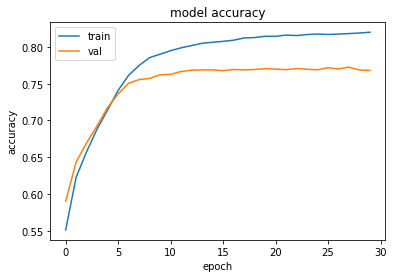

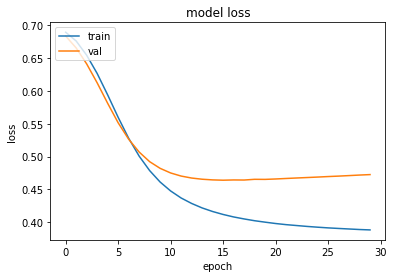

In [14]:
# Attempt 3: Fourth Root of Vocab Size as Embedding dimension
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

Epoch 1/30
719/719 [==============================] - 3s 3ms/step - loss: 0.6913 - accuracy: 0.5828 - val_loss: 0.6881 - val_accuracy: 0.6365
Epoch 2/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6825 - accuracy: 0.6483 - val_loss: 0.6753 - val_accuracy: 0.6597
Epoch 3/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6674 - accuracy: 0.6710 - val_loss: 0.6578 - val_accuracy: 0.6705
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6472 - accuracy: 0.6874 - val_loss: 0.6353 - val_accuracy: 0.6887
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6223 - accuracy: 0.7069 - val_loss: 0.6107 - val_accuracy: 0.7033
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5961 - accuracy: 0.7225 - val_loss: 0.5864 - val_accuracy: 0.7220
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.5700 - accuracy: 0.7396 - val_loss: 0.5632 - val_accuracy: 0.7344
Epoch 

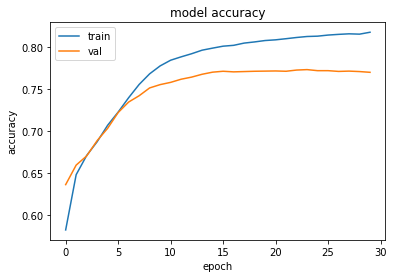

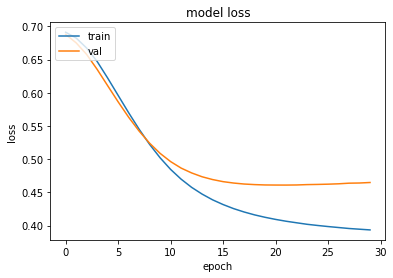

In [21]:
# Attempt 4: Smaller number of denser layer neurons
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

Epoch 1/30
719/719 [==============================] - 3s 3ms/step - loss: 0.6910 - accuracy: 0.5607 - val_loss: 0.6882 - val_accuracy: 0.6109
Epoch 2/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6849 - accuracy: 0.6078 - val_loss: 0.6796 - val_accuracy: 0.6417
Epoch 3/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6747 - accuracy: 0.6380 - val_loss: 0.6671 - val_accuracy: 0.6581
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6611 - accuracy: 0.6532 - val_loss: 0.6520 - val_accuracy: 0.6707
Epoch 5/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6454 - accuracy: 0.6704 - val_loss: 0.6351 - val_accuracy: 0.6858
Epoch 6/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6287 - accuracy: 0.6884 - val_loss: 0.6175 - val_accuracy: 0.7035
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6115 - accuracy: 0.7004 - val_loss: 0.5997 - val_accuracy: 0.7172
Epoch 

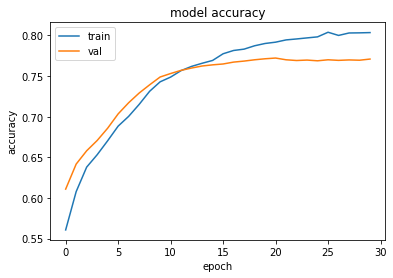

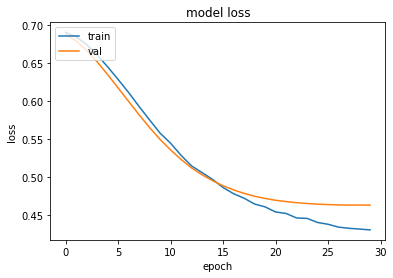

In [22]:
# Attempt 5: Trying out dropouts
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

Epoch 1/30
719/719 [==============================] - 3s 3ms/step - loss: 0.7615 - accuracy: 0.5757 - val_loss: 0.7475 - val_accuracy: 0.6305
Epoch 2/30
719/719 [==============================] - 2s 3ms/step - loss: 0.7367 - accuracy: 0.6336 - val_loss: 0.7264 - val_accuracy: 0.6445
Epoch 3/30
719/719 [==============================] - 2s 2ms/step - loss: 0.7183 - accuracy: 0.6492 - val_loss: 0.7103 - val_accuracy: 0.6527
Epoch 4/30
719/719 [==============================] - 2s 3ms/step - loss: 0.7038 - accuracy: 0.6584 - val_loss: 0.6972 - val_accuracy: 0.6554
Epoch 5/30
719/719 [==============================] - 2s 2ms/step - loss: 0.6916 - accuracy: 0.6644 - val_loss: 0.6858 - val_accuracy: 0.6632
Epoch 6/30
719/719 [==============================] - 2s 2ms/step - loss: 0.6806 - accuracy: 0.6721 - val_loss: 0.6753 - val_accuracy: 0.6655
Epoch 7/30
719/719 [==============================] - 2s 3ms/step - loss: 0.6702 - accuracy: 0.6759 - val_loss: 0.6654 - val_accuracy: 0.6709
Epoch 

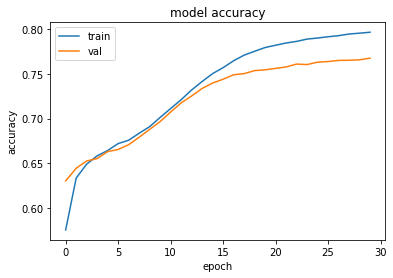

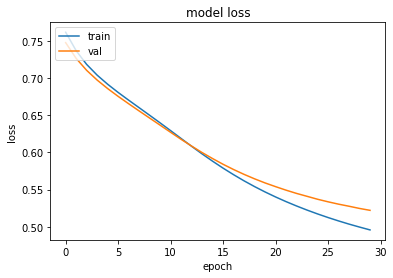

In [23]:
# Attempt 6: L2 Regularization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (testing_padded, testing_labels))

plot_results(training_results)

In [26]:
# Test Sequences

actual_test_sentences = ["granny starting to fear spiders in the garden might be real",
             "game of thrones season finale showing this sunday night",
             "TensorFlow book will be a best seller"]

actual_test_senquences = tokenizer.texts_to_sequences(actual_test_sentences)
print(actual_test_senquences)

actual_test_padded = pad_sequences(actual_test_senquences, padding=padding_type, maxlen=max_length, truncating=trunc_type)
print(actual_test_padded)


[[1, 576, 1, 758, 1, 1, 1, 1, 246, 1, 108], [111, 1, 855, 176, 1, 1, 1, 1829, 161], [1, 242, 1, 1, 1, 42, 1]]
[[   1  576    1  758    1    1    1    1  246    1]
 [ 111    1  855  176    1    1    1 1829  161    0]
 [   1  242    1    1    1   42    1    0    0    0]]


In [27]:
print(model.predict(actual_test_padded))

[[0.6828089 ]
 [0.5645531 ]
 [0.35788792]]
